# Internship project on Heart disease prediction
## By -
## preeti Kumari Sah
## 170310007039

# Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


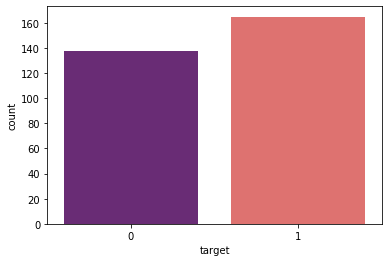

In [5]:
sns.countplot(x="target", data = data, palette="magma")

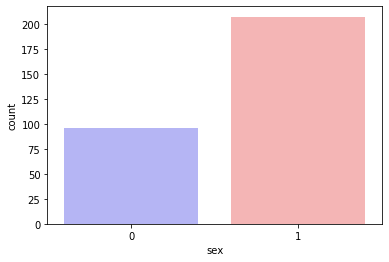

In [6]:
sns.countplot(x="sex", data = data, palette="bwr")

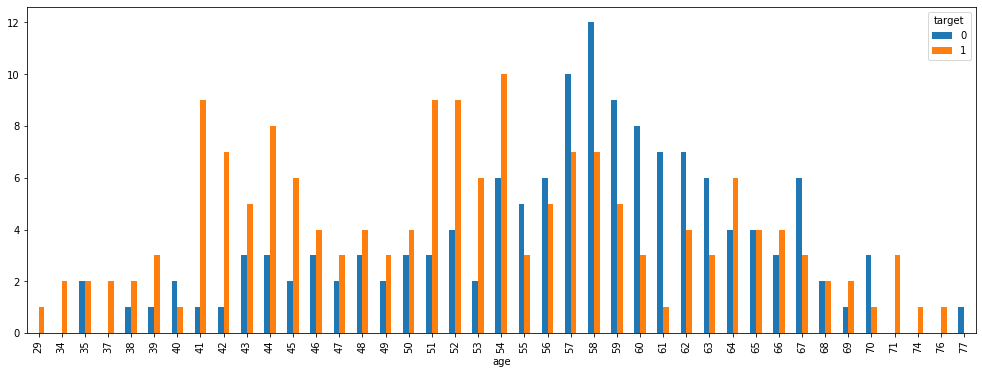

In [10]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(17,6))

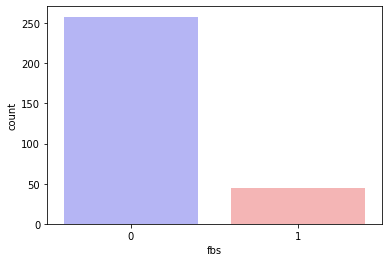

In [11]:
sns.countplot(x="fbs", data = data, palette="bwr")

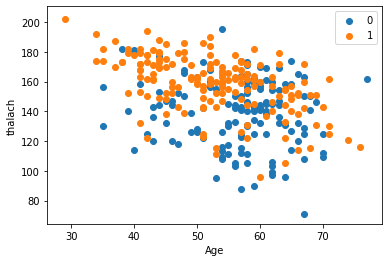

In [21]:
plt.scatter(data.age[data.target==0],data.thalach[data.target==0])
plt.scatter(data.age[data.target==1],data.thalach[data.target==1])
plt.legend(["0","1"])
plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()

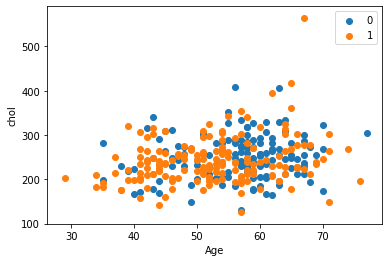

In [22]:
plt.scatter(data.age[data.target==0],data.chol[data.target==0])
plt.scatter(data.age[data.target==1],data.chol[data.target==1])
plt.legend(["0","1"])
plt.xlabel("Age")
plt.ylabel("chol")
plt.show()

# Scaling the data

In [3]:
from sklearn.preprocessing import StandardScaler    

In [4]:
sc = StandardScaler()
data[["age","trestbps","chol","thalach","oldpeak"]] = sc.fit_transform(data[["age","trestbps","chol","thalach","oldpeak"]])

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [6]:
data[["sex","cp","fbs","restecg","exang","slope","ca","thal"]] = data[["sex","cp","fbs","restecg","exang","slope","ca","thal"]].astype(object)

# Creating dummy variables


In [7]:
data=pd.get_dummies(data)

In [8]:
X = data.copy()
y = data["target"]

In [9]:
X.drop(columns="target",axis=1,inplace=True)

In [10]:
X = X.values
y=y.values

In [11]:
X

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Splitting data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [15]:
X_train.shape

(257, 30)

In [16]:
from sklearn.metrics import classification_report

# Applying KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
cm = confusion_matrix(y_test,pred)
cm

array([[18,  5],
       [ 5, 18]], dtype=int64)

In [23]:
ac=accuracy_score(y_test, pred)
ac

0.782608695652174

In [24]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.78      0.78      0.78        23

   micro avg       0.78      0.78      0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



# Applying Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
pred1 = dt.predict(X_test)

In [29]:
cm1=confusion_matrix(y_test,pred1)
cm1

array([[17,  6],
       [ 4, 19]], dtype=int64)

In [30]:
ac1=accuracy_score(y_test, pred1)
ac1

0.782608695652174

In [31]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.83      0.76      0.79        25

   micro avg       0.78      0.78      0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



# Applying Support Vector Machine

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()

In [34]:
svc.fit(X_train,y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
pred2 = svc.predict(X_test)

In [36]:
cm2=confusion_matrix(y_test,pred2)
cm2

array([[17,  6],
       [ 3, 20]], dtype=int64)

In [37]:
ac2=accuracy_score(y_test, pred2)
ac2

0.8043478260869565

In [38]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.87      0.77      0.82        26

   micro avg       0.80      0.80      0.80        46
   macro avg       0.80      0.81      0.80        46
weighted avg       0.81      0.80      0.81        46



# Applying Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier()

In [41]:
rfc.fit(X_train,y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
pred3 = rfc.predict(X_test)

In [43]:
cm3=confusion_matrix(y_test,pred3)
cm3

array([[16,  7],
       [ 5, 18]], dtype=int64)

In [44]:
ac3=accuracy_score(y_test, pred3)
ac3

0.7391304347826086

In [45]:
print(classification_report(pred3,y_test))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.78      0.72      0.75        25

   micro avg       0.74      0.74      0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46



# Applying Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb = GaussianNB()

In [48]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
pred4 = nb.predict(X_test)

In [50]:
cm4=confusion_matrix(y_test,pred4)
cm4

array([[17,  6],
       [ 4, 19]], dtype=int64)

In [51]:
ac4=accuracy_score(y_test, pred4)
ac4

0.782608695652174

In [52]:
print(classification_report(pred4,y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.83      0.76      0.79        25

   micro avg       0.78      0.78      0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



# Accuracy

Accuracy of models


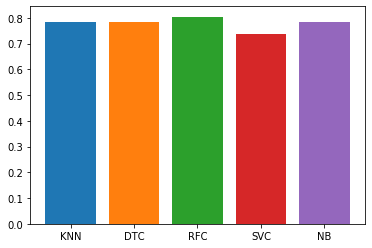

In [53]:
print("Accuracy of models")

plt.bar(0,ac)
plt.bar(1,ac1)
plt.bar(2,ac2)
plt.bar(3,ac3)
plt.bar(4,ac4)

plt.xticks([0,1,2,3,4], ['KNN','DTC','RFC','SVC','NB'])
plt.show()

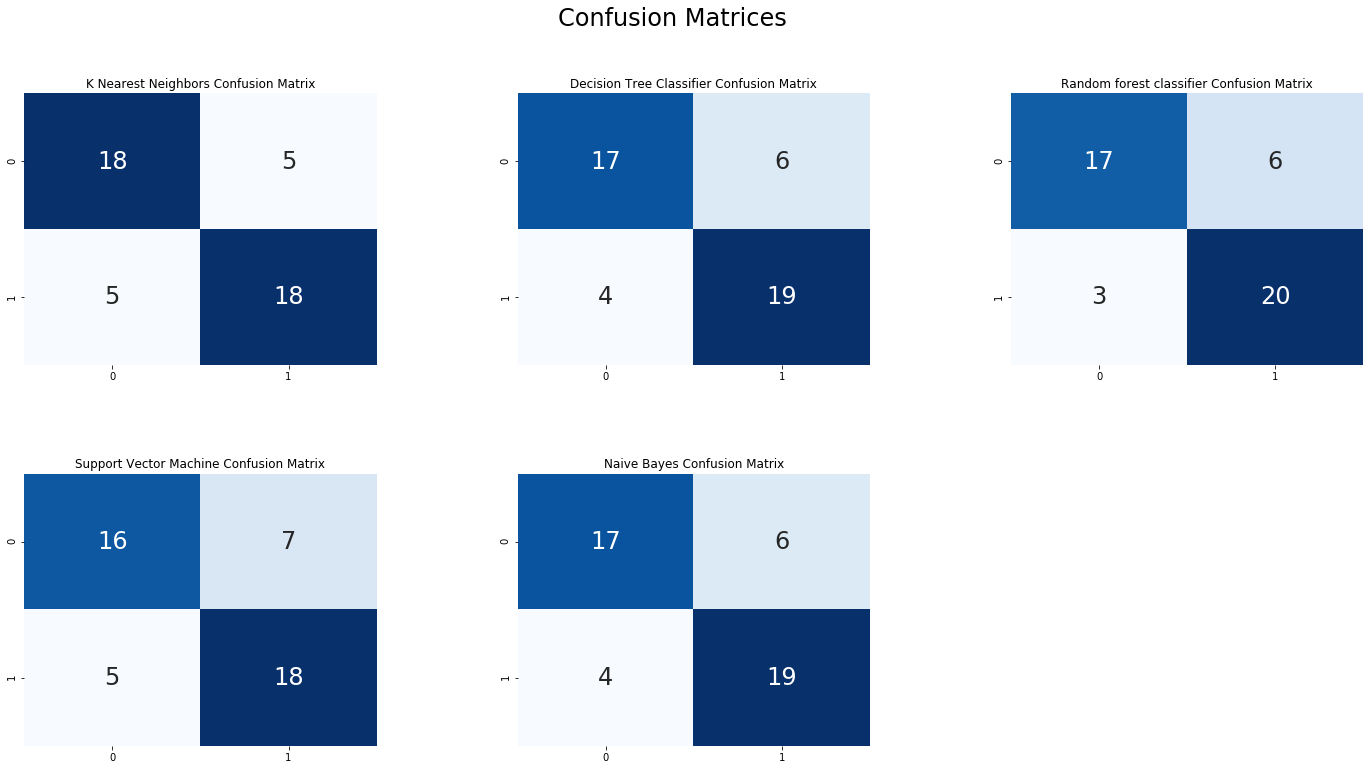

In [54]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random forest classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")

sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()